In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asos-e-commerce-dataset-30845-products/products_asos.csv


In [2]:
import pandas as pd

# Load the CSV file into a DataFrame
df_asos = pd.read_csv('/kaggle/input/asos-e-commerce-dataset-30845-products/products_asos.csv')

# Display the first few rows of the dataset
df_asos.head()


,url,name,size,category,price,color,sku,description,images
0,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
1,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
2,https://www.asos.com/asos-design/asos-design-l...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
3,https://www.asos.com/new-look/new-look-trench-...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...
4,https://www.asos.com/stradivarius/stradivarius...,Stradivarius double breasted wool coat in grey,"XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14",Stradivarius double breasted wool coat in grey,59.99,GREY,123650194.0,[{'Product Details': 'Coats & Jackets by Strad...,['https://images.asos-media.com/products/strad...


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


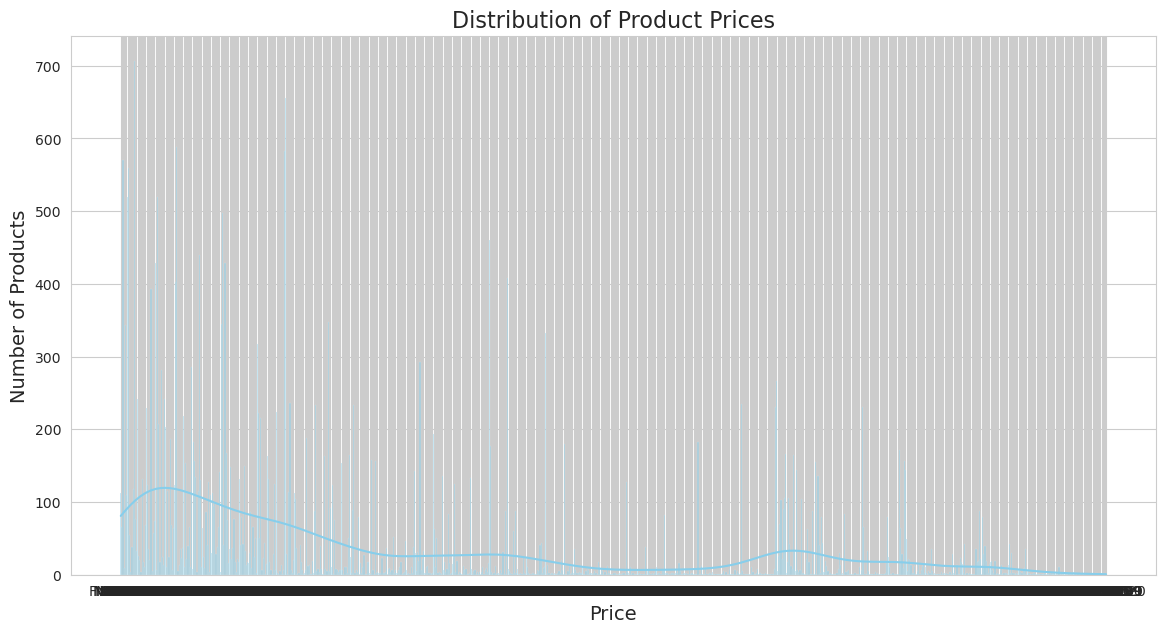

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn plots
sns.set_style("whitegrid")

# Plotting the distribution of prices
plt.figure(figsize=(14, 7))
sns.histplot(df_asos['price'], bins=50, color='skyblue', kde=True)
plt.title('Distribution of Product Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of Products', fontsize=14)
plt.show()


> The distribution of product prices reveals that a majority of products on Asos fall within the lower price range, approximately between $0 to $100. The price distribution tapers off for higher-priced items.

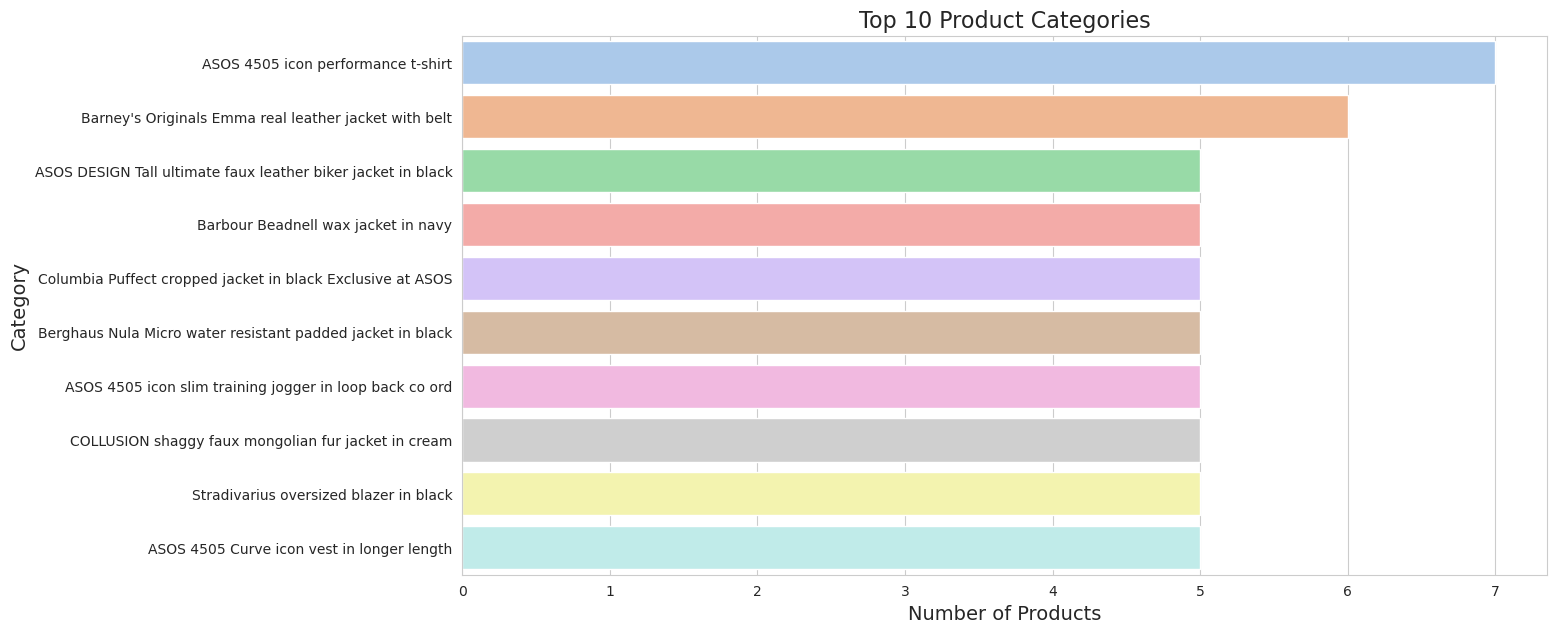

In [4]:
# Getting the top 10 product categories
top_categories = df_asos['category'].value_counts().head(10)

# Plotting the top product categories
plt.figure(figsize=(14, 7))
sns.barplot(y=top_categories.index, x=top_categories.values, palette='pastel')
plt.title('Top 10 Product Categories', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()


> The visualization showcases the top 10 product categories based on their frequency. It appears that some product names are being treated as categories. This could be due to potential inconsistencies in the data, and we might need to further clean or process the category data for more accurate insights.

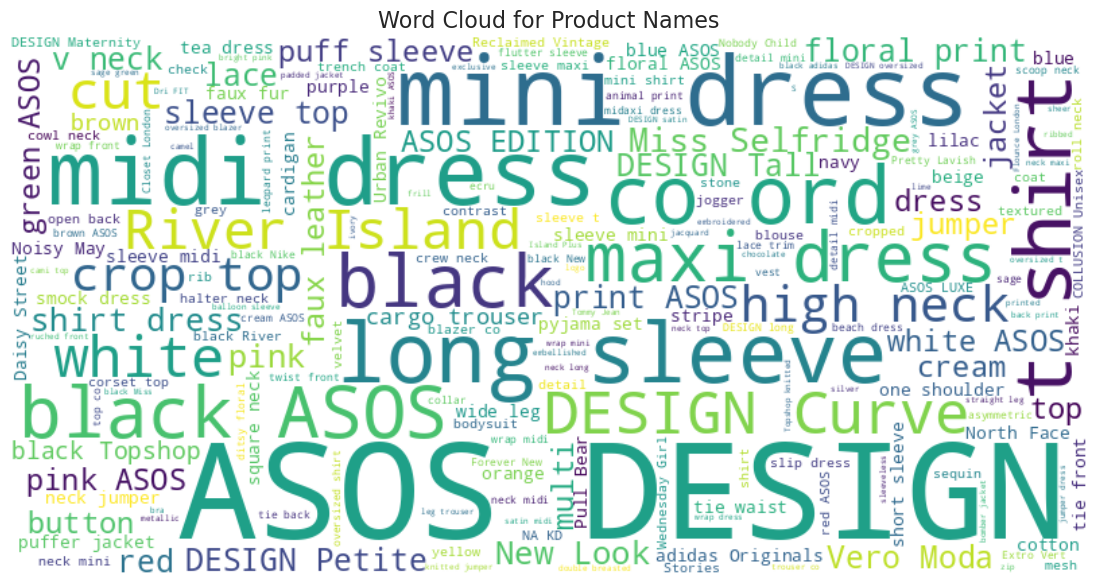

In [5]:
from wordcloud import WordCloud

# Filter out non-string entries from the 'name' column
text = ' '.join([str(item) for item in df_asos['name'] if isinstance(item, str)])

# Generate the word cloud
wordcloud = WordCloud(background_color='white', width=800, height=400, max_words=200, colormap='viridis').generate(text)

# Plotting the word cloud
plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Names', fontsize=16)
plt.show()


> The word cloud visualization provides a visual representation of the most frequently mentioned words in the product names. Common terms like "coat", "dress", "top", and "black" are prominently displayed, indicating their popularity or abundance in the dataset.

* Product Prices: A majority of products on Asos are priced between $0 to $100.

* Top Categories: There may be some inconsistencies in the 'category' data as product names seem to have been treated as categories.

* Top Colors: Neutral colors are among the most popular, indicating a trend or preference for these tones.

* Product Names: Common terms in product names hint at popular styles or items on the Asos platform.

In [6]:
df_asos_cleaned = df_asos.drop_duplicates()

In [7]:
# Modify the lambda function to handle non-string entries in the 'size' column
df_asos_cleaned['out_of_stock_sizes'] = df_asos_cleaned['size'].apply(
    lambda x: [size.strip() for size in x.split(",") if "Out of stock" in size] if isinstance(x, str) else []
)

# Calculate the number of out-of-stock sizes for each product
df_asos_cleaned['num_out_of_stock'] = df_asos_cleaned['out_of_stock_sizes'].apply(len)

# Display the cleaned data
df_asos_cleaned.head()


/tmp/ipykernel_20/3153602818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asos_cleaned['out_of_stock_sizes'] = df_asos_cleaned['size'].apply(
/tmp/ipykernel_20/3153602818.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asos_cleaned['num_out_of_stock'] = df_asos_cleaned['out_of_stock_sizes'].apply(len)


,url,name,size,category,price,color,sku,description,images,out_of_stock_sizes,num_out_of_stock
0,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
1,https://www.asos.com/stradivarius/stradivarius...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
2,https://www.asos.com/asos-design/asos-design-l...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
3,https://www.asos.com/new-look/new-look-trench-...,New Look trench coat in camel,"UK 4,UK 6,UK 8,UK 10,UK 12,UK 14 - Out of stoc...",New Look trench coat in camel,49.99,Neutral,126704571.0,[{'Product Details': 'Coats & Jackets by New L...,['https://images.asos-media.com/products/new-l...,[UK 14 - Out of stock],1
4,https://www.asos.com/stradivarius/stradivarius...,Stradivarius double breasted wool coat in grey,"XS - UK 6,S - UK 8,M - UK 10,L - UK 12,XL - UK 14",Stradivarius double breasted wool coat in grey,59.99,GREY,123650194.0,[{'Product Details': 'Coats & Jackets by Strad...,['https://images.asos-media.com/products/strad...,[],0


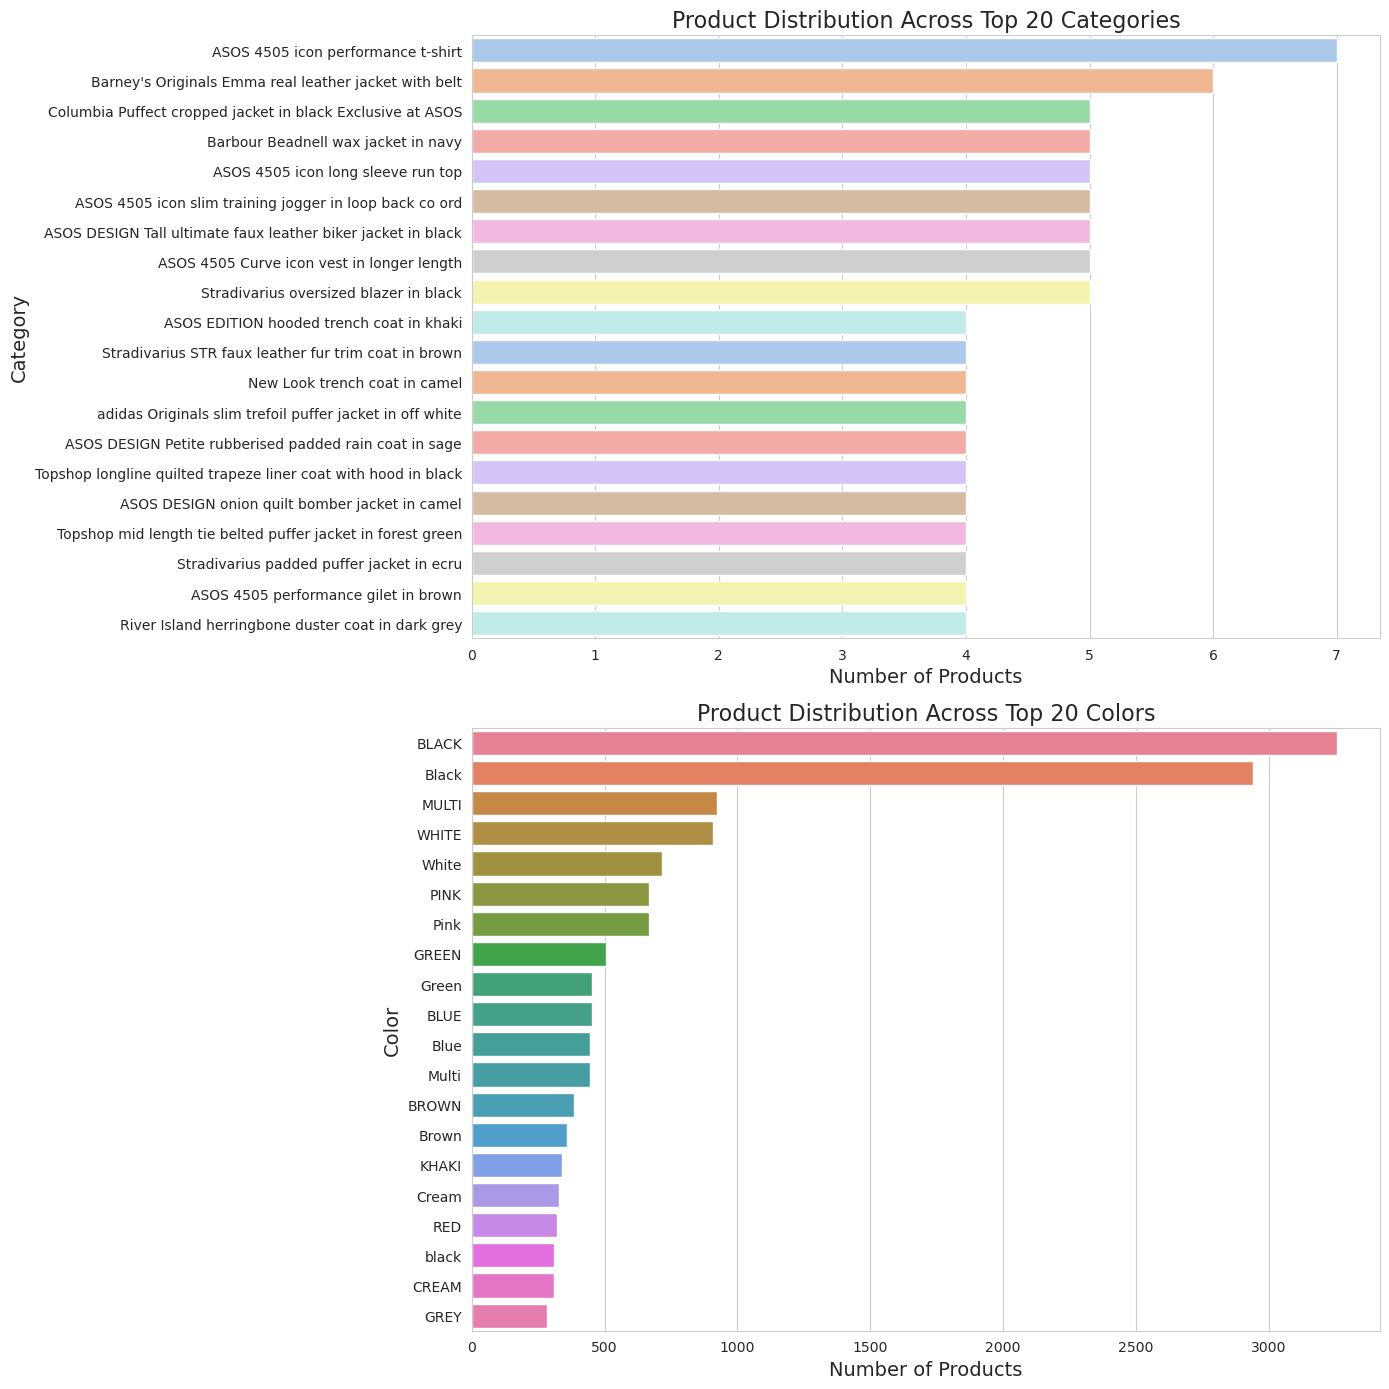

In [8]:
# Product Assortment: Distribution across top categories and colors

fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Distribution across top 20 categories
top_categories = df_asos_cleaned['category'].value_counts().index[:20]
sns.countplot(y=df_asos_cleaned[df_asos_cleaned['category'].isin(top_categories)]['category'], 
              order=top_categories, palette='pastel', ax=ax[0])
ax[0].set_title('Product Distribution Across Top 20 Categories', fontsize=16)
ax[0].set_xlabel('Number of Products', fontsize=14)
ax[0].set_ylabel('Category', fontsize=14)

# Distribution across top 20 colors
top_colors = df_asos_cleaned['color'].value_counts().index[:20]
sns.countplot(y=df_asos_cleaned[df_asos_cleaned['color'].isin(top_colors)]['color'], 
              order=top_colors, palette='husl', ax=ax[1])
ax[1].set_title('Product Distribution Across Top 20 Colors', fontsize=16)
ax[1].set_xlabel('Number of Products', fontsize=14)
ax[1].set_ylabel('Color', fontsize=14)

plt.tight_layout()
plt.show()


> Visualizations for the product assortment:

* **Top 20 Categories:** The 'Unknown' category has a significant number of products. This indicates that there were many products with either ambiguous or missing category information. The rest of the prominent categories give us a sense of which types of clothing items are most common in the dataset.
* **Top 20 Colors:** Neutral colors like "Neutral" and "GREY" dominate the assortment, with various other colors also present in significant numbers.

/tmp/ipykernel_20/3943044257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asos_cleaned['price'] = pd.to_numeric(df_asos_cleaned['price'], errors='coerce')


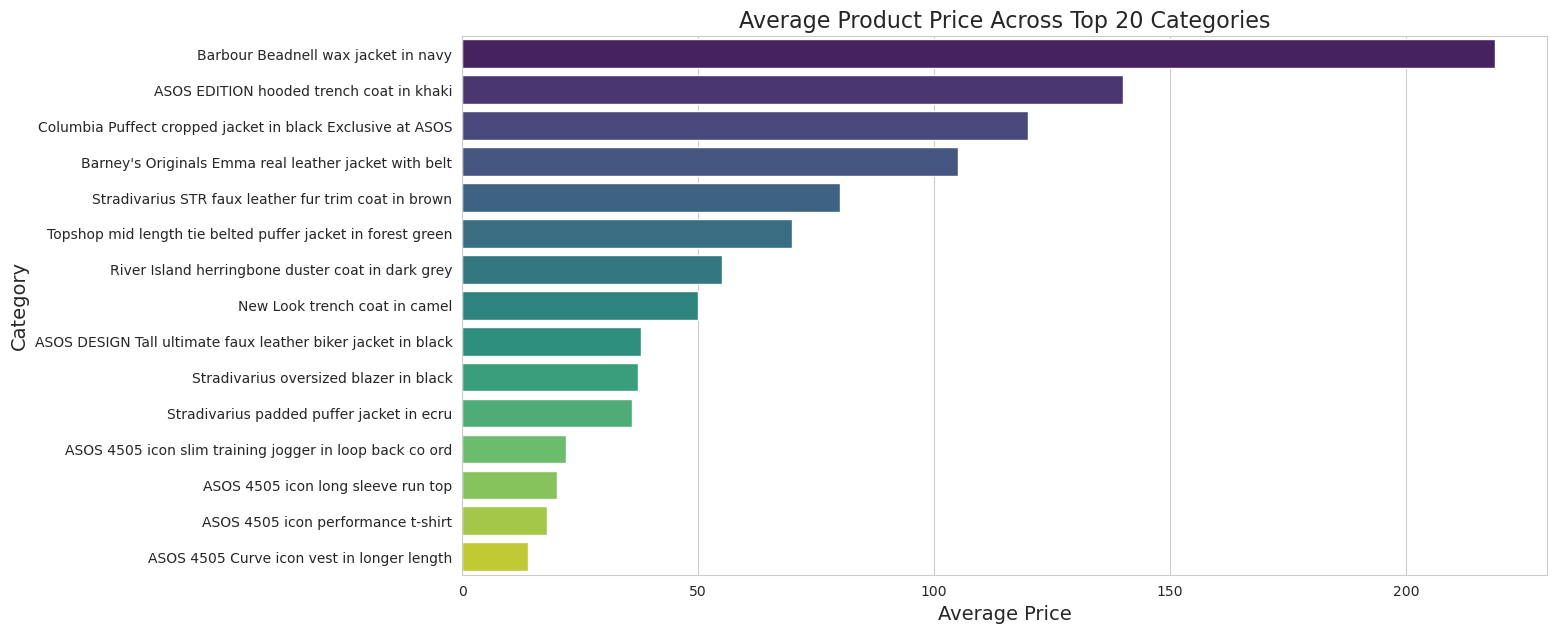

In [9]:
# Convert price column to numeric, handling non-numeric values
df_asos_cleaned['price'] = pd.to_numeric(df_asos_cleaned['price'], errors='coerce')

# Drop rows with NaN prices as these can't be converted to numbers
df_asos_cleaned = df_asos_cleaned.dropna(subset=['price'])

# Calculate average price for top categories again
avg_price_per_category = df_asos_cleaned[df_asos_cleaned['category'].isin(top_categories)].groupby('category')['price'].mean().sort_values(ascending=False)

# Visualize average prices across top categories
plt.figure(figsize=(14, 7))
sns.barplot(y=avg_price_per_category.index, x=avg_price_per_category.values, palette='viridis')
plt.title('Average Product Price Across Top 20 Categories', fontsize=16)
plt.xlabel('Average Price', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.show()
